# Movies Rating Analysis
# Import Libraries




In [2]:
data=pd.read_csv('tv_shows.csv')
data.shape

(5611, 11)

# Import Dataset

In [ ]:
data = pd.read_csv("tv_shows.csv")

# Explore dataset

In [3]:
data.head()

,Unnamed: 0,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5611 entries, 0 to 5610
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       5611 non-null   int64  
 1   Title            5611 non-null   object 
 2   Year             5611 non-null   int64  
 3   Age              3165 non-null   object 
 4   IMDb             4450 non-null   float64
 5   Rotten Tomatoes  1011 non-null   object 
 6   Netflix          5611 non-null   int64  
 7   Hulu             5611 non-null   int64  
 8   Prime Video      5611 non-null   int64  
 9   Disney+          5611 non-null   int64  
 10  type             5611 non-null   int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 482.3+ KB


In [5]:
data.isnull().sum()

Unnamed: 0            0
Title                 0
Year                  0
Age                2446
IMDb               1161
Rotten Tomatoes    4600
Netflix               0
Hulu                  0
Prime Video           0
Disney+               0
type                  0
dtype: int64

1.Here Rotten Tomatoes has 4600 missing values and unnamed: 0,type are not usefull for the analysis, so we should drop these three columns.
2. drop the missing values rows from the data set.

In [6]:
data.drop(["Unnamed: 0",'type','Rotten Tomatoes'],axis=1,inplace=True)
data.dropna(inplace=True)

After droping the null values and unwanted columns

In [7]:
data.shape

(3136, 8)

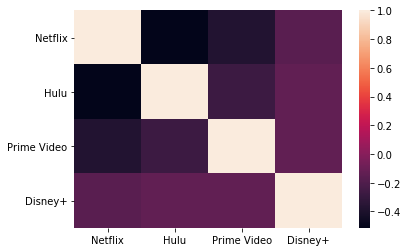

In [8]:
import seaborn as sm
corr=data[["Netflix",'Hulu','Prime Video',"Disney+"]].corr()
sm.heatmap(corr)

Total number of shows/movies in different platforms.

In [9]:
data.sum()["Netflix":"Disney+"]

Netflix        1223
Hulu           1269
Prime Video     794
Disney+         149
dtype: object

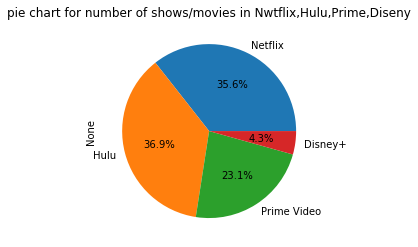

In [10]:
data.sum()["Netflix":"Disney+"].plot(kind='pie',autopct='%1.1f%%',title='pie chart for number of shows/movies in Nwtflix,Hulu,Prime,Diseny')

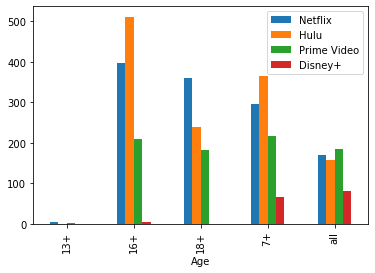

In [11]:
Age_=data.groupby('Age').sum()[['Netflix','Hulu','Prime Video','Disney+']]
Age_.plot(kind='bar')

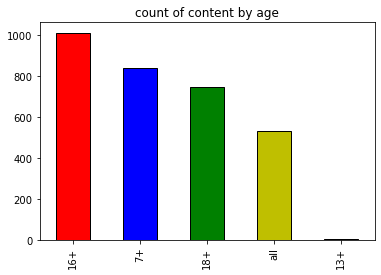

In [12]:
colors=['r','b','g','y']
data.Age.value_counts().plot(kind='bar',edgecolor='black',color=colors,title='count of content by age')

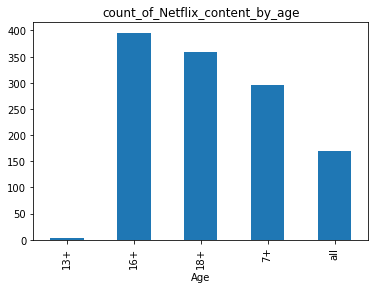

In [13]:
Age_.Netflix.plot(kind='bar',title='count_of_Netflix_content_by_age')

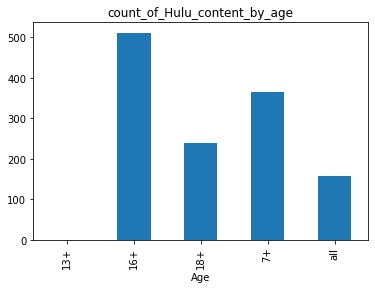

In [14]:
Age_.Hulu.plot(kind='bar',title='count_of_Hulu_content_by_age')

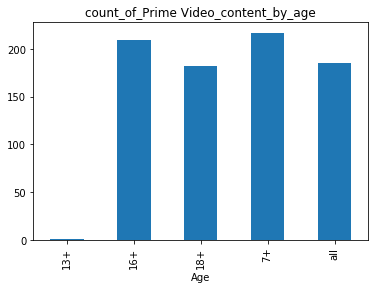

In [15]:
Age_['Prime Video'].plot(kind='bar',title='count_of_Prime Video_content_by_age')

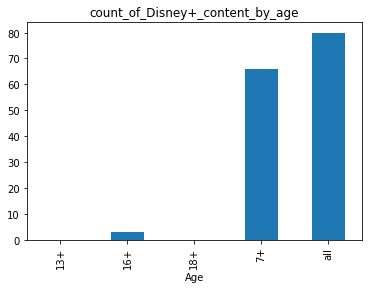

In [16]:
Age_['Disney+'].plot(kind='bar',title='count_of_Disney+_content_by_age')

number of shows in particular year

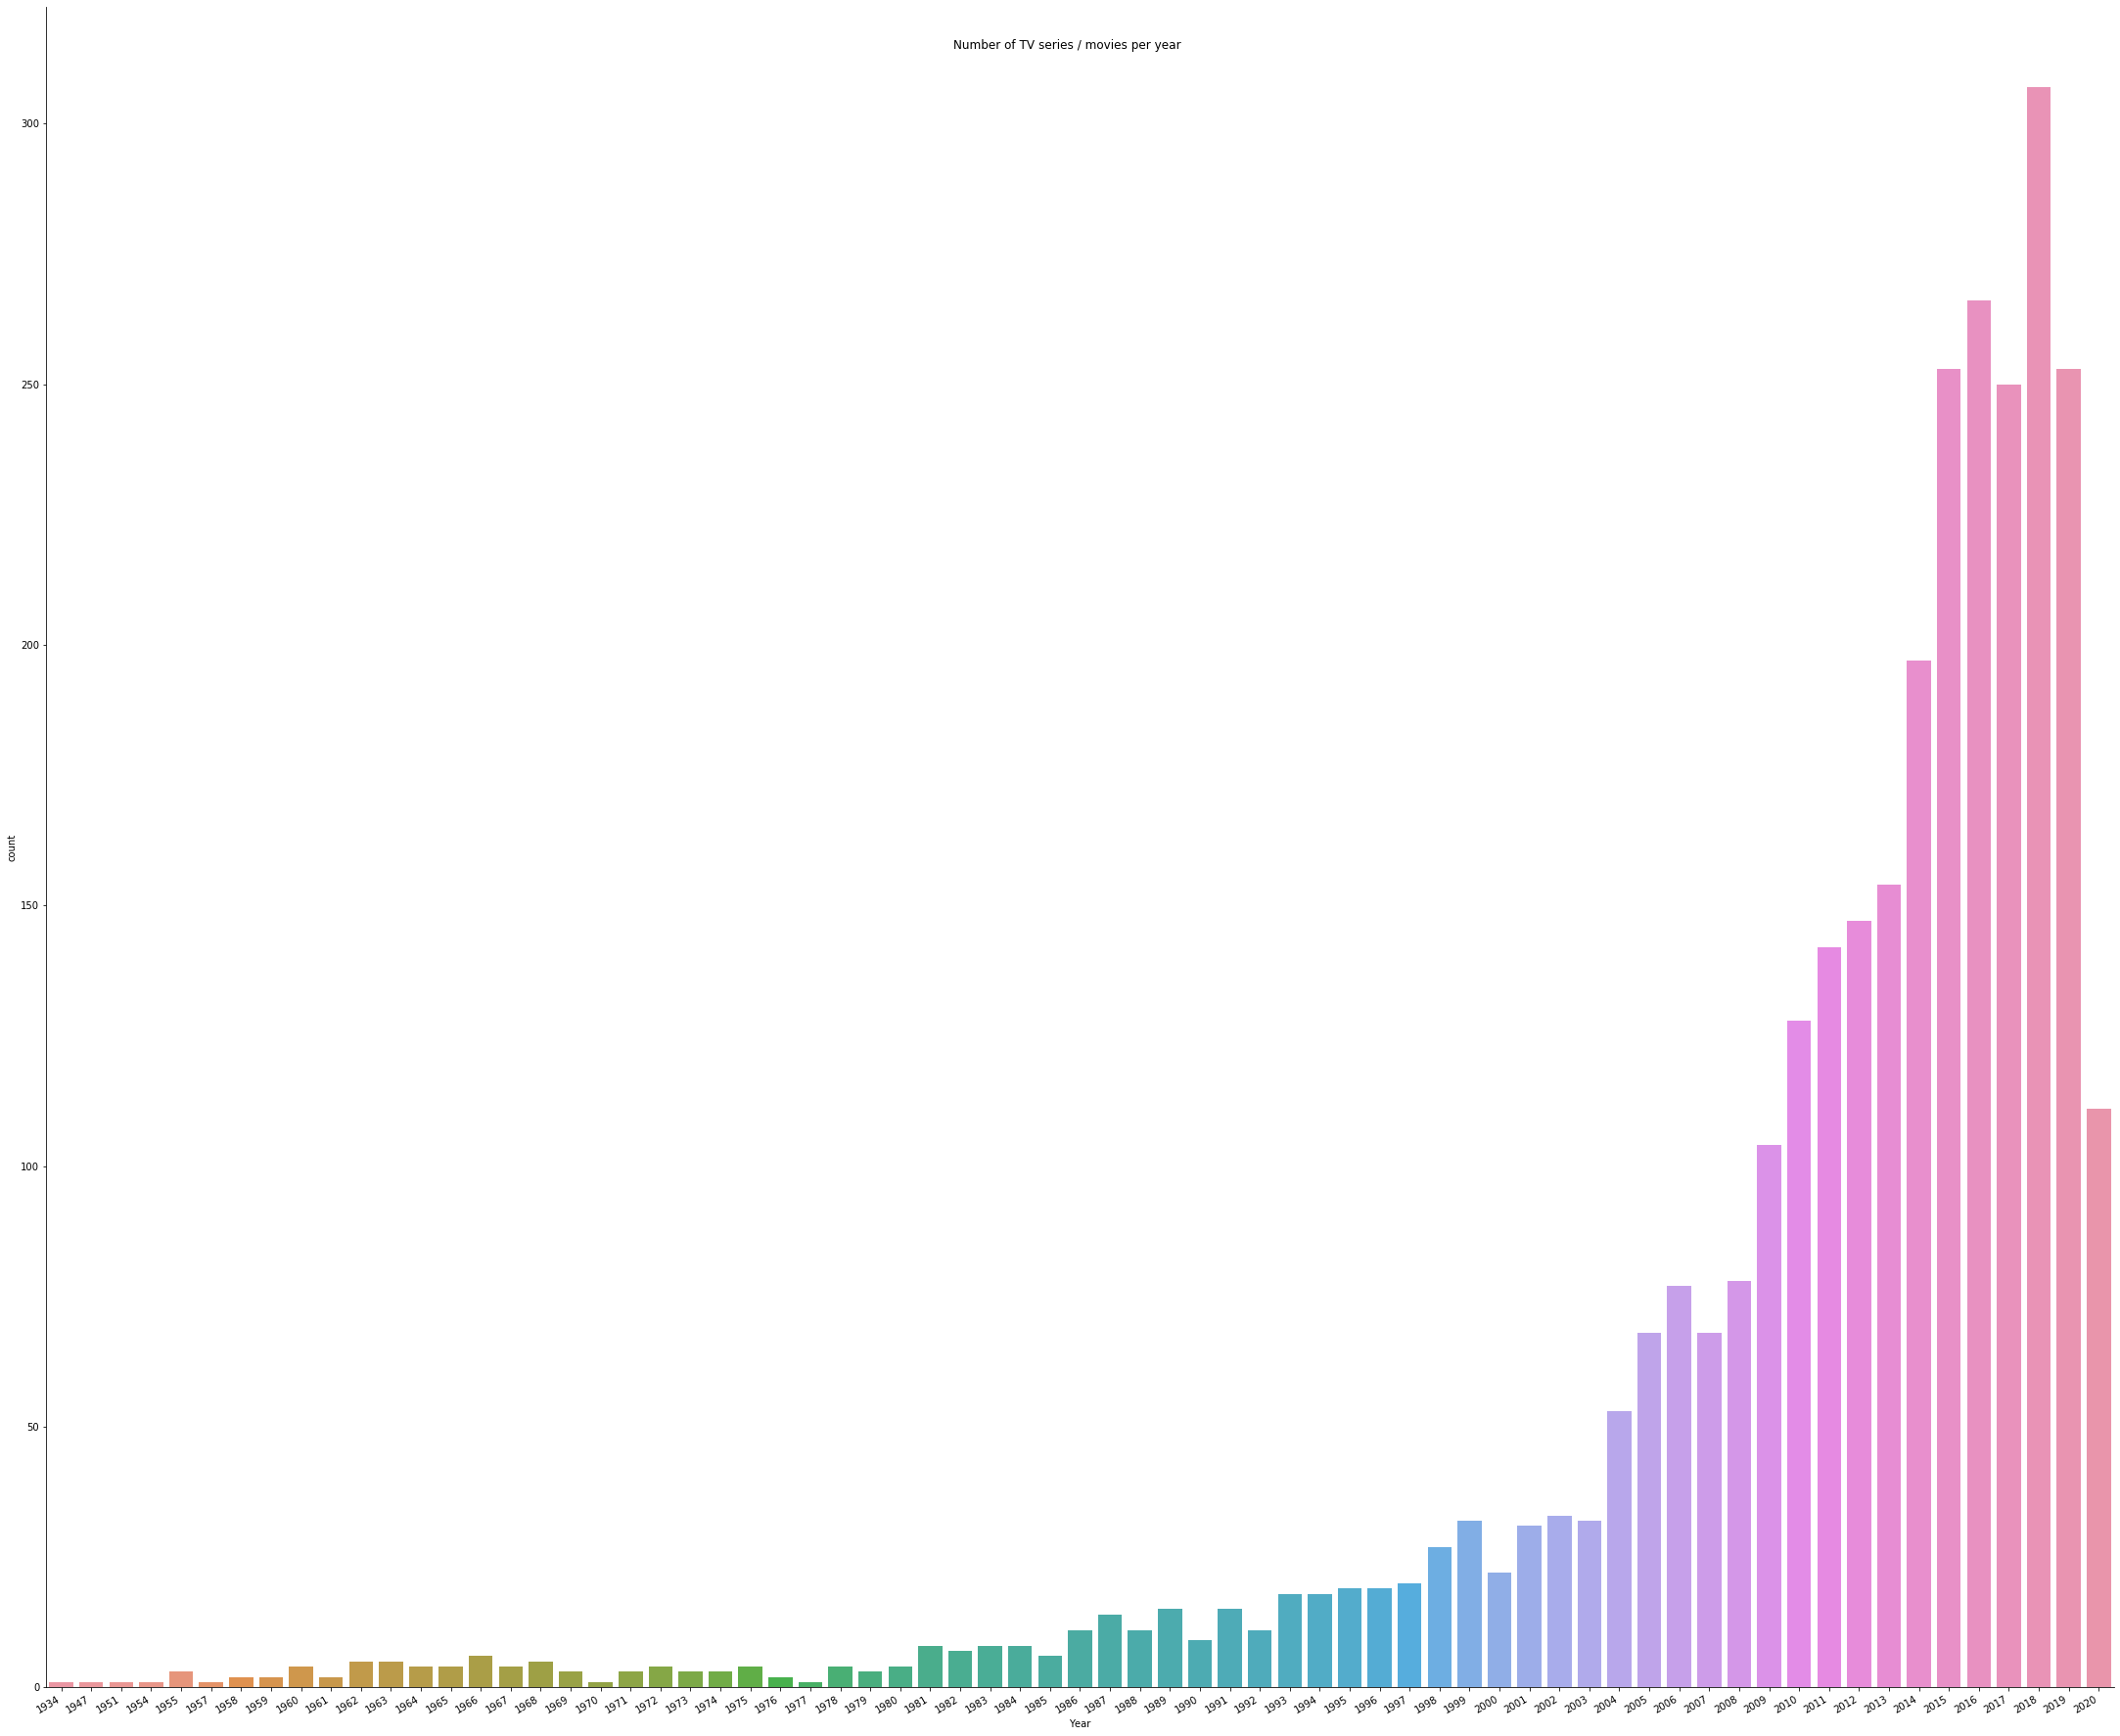

In [17]:
ax=sm.catplot(x='Year',kind='count',data=data,orient="h",height=30,aspect=1,)
ax.fig.suptitle('Number of TV series / movies per year')
ax.fig.autofmt_xdate()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


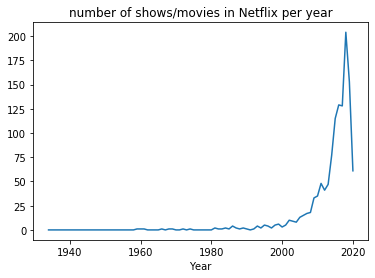

In [18]:
yearswise=data.groupby(["Year"])['Netflix','Hulu','Prime Video','Disney+'].sum()
yearswise.Netflix.plot(title='number of shows/movies in Netflix per year')


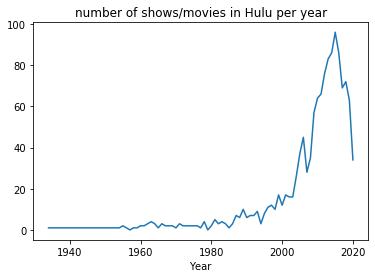

In [19]:
yearswise.Hulu.plot(title='number of shows/movies in Hulu per year')

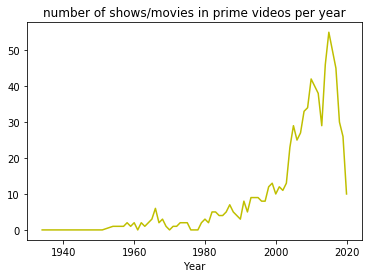

In [20]:
yearswise['Prime Video'].plot(title='number of shows/movies in prime videos per year',color='y')

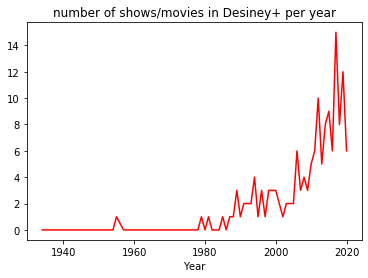

In [21]:
yearswise['Disney+'].plot(title='number of shows/movies in Desiney+ per year',color='r')